**Practical implementation of statistics** 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import pandas as pd
import random

tips dataset

In [6]:
df=sns.load_dataset('titanic')

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


0.1 Data conversion and numerical Dataset

In [8]:
#converting class values to integer and type from category to int64
df['class']=df['class'].replace('First',1).replace('Second',2).replace('Third',3)
df['class']=df['class'].astype('int64')

In [9]:
#converting alone values to integer and type from bool to int64
df['alone']=df['alone'].replace('True',1).replace('False',2)
df['alone']=df['alone'].astype('int64')

In [10]:
df_numerical=df[df.dtypes[df.dtypes!="object"].index]

In [11]:
df_numerical.drop(["adult_male","deck"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


0.2 checking dataset for NAN values 

In [13]:
df_numerical.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
class         0
alone         0
dtype: int64

0.3 Mean and Median of age

In [14]:
np.mean(df_numerical['age'])

29.69911764705882

In [15]:
np.median(df_numerical['age'])

nan

Boxplot for checking outliers/


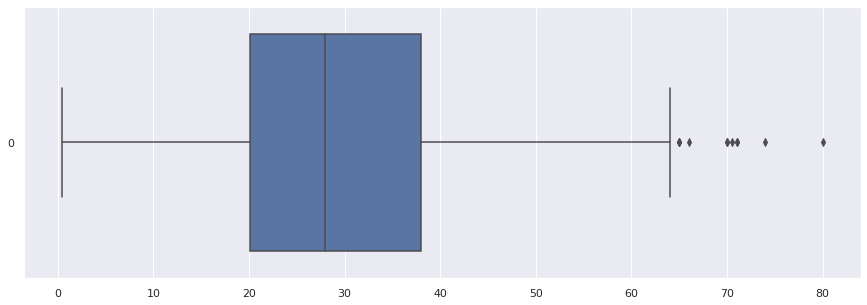

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")
#since age column contains outliers so it is better to use median for filling NAN values but the median of
#age is NAN itself so using mean of age to fill NAN values


Replacing NaN values with mean

In [17]:
df_numerical['age'].fillna(np.mean(df_numerical['age']),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df_numerical['age'].isnull().sum()

0

In [19]:
df_numerical.isnull().sum()  #no NaN values in Numerical dataset

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
class       0
alone       0
dtype: int64

Measure of central tendency

In [20]:
np.mean(df_numerical,axis=0)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
class        2.308642
alone        0.602694
dtype: float64

In [21]:
np.median(df_numerical,axis=0)

array([ 0.        ,  3.        , 29.69911765,  0.        ,  0.        ,
       14.4542    ,  3.        ,  1.        ])

In [22]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,3,man,True,C,Southampton,no,1


In [23]:
#for individual columns
stat.mode(df['age'])

24.0

2.0 Measure of dispersion

2.0 Variance

In [24]:
df_numerical.var()

survived       0.236772
pclass         0.699015
age          169.052400
sibsp          1.216043
parch          0.649728
fare        2469.436846
class          0.699015
alone          0.239723
dtype: float64

In [25]:
#for individual columns
stat.variance(df_numerical['fare'])

2469.4368457431165

2.2 Standard deviation

In [26]:
df_numerical.std()

survived     0.486592
pclass       0.836071
age         13.002015
sibsp        1.102743
parch        0.806057
fare        49.693429
class        0.836071
alone        0.489615
dtype: float64

In [27]:
#for individual columns
stat.stdev(df_numerical['class'])

0.836071240977049

3.0 Five point summary

3.1 For survived column

In [28]:
print('minimum value is {}'.format(df_numerical['survived'].min()))
print('1st quartile is {}'.format(np.percentile(df_numerical['survived'],25)))
print('median is {}'.format(np.percentile(df_numerical['survived'],50)))
print('3rd quartile is {}'.format(np.percentile(df_numerical['survived'],50)))
print('maximum value is {}'.format(df_numerical['survived'].max()))

minimum value is 0
1st quartile is 0.0
median is 0.0
3rd quartile is 0.0
maximum value is 1


3.2 For pclass Column


In [29]:

print("Minimum value is: {}".format(df_numerical['pclass'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['pclass'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['pclass'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['pclass'], 75)))
print("Maximum value is: {}".format(df_numerical['pclass'].max()))


Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


3.3 For age Column

In [30]:

print("Minimum value is: {}".format(df_numerical['age'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['age'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['age'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['age'], 75)))
print("Maximum value is: {}".format(df_numerical['age'].max()))

Minimum value is: 0.42
1st quartile is: 22.0
Median is: 29.69911764705882
3rd quartile is: 35.0
Maximum value is: 80.0


3.4 For sibsp (Siblings) Column

In [31]:

print("Minimum value is: {}".format(df_numerical['sibsp'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['sibsp'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['sibsp'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['sibsp'], 75)))
print("Maximum value is: {}".format(df_numerical['sibsp'].max()))

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 1.0
Maximum value is: 8


3.5 For parch (parent-child) Column


In [32]:

print("Minimum value is: {}".format(df_numerical['parch'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['parch'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['parch'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['parch'], 75)))
print("Maximum value is: {}".format(df_numerical['parch'].max()))


Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 0.0
Maximum value is: 6


3.6 For fare Column

In [33]:
print("Minimum value is: {}".format(df_numerical['fare'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['fare'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['fare'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['fare'], 75)))
print("Maximum value is: {}".format(df_numerical['fare'].max()))


Minimum value is: 0.0
1st quartile is: 7.9104
Median is: 14.4542
3rd quartile is: 31.0
Maximum value is: 512.3292


3.7 For class Column


In [34]:

print("Minimum value is: {}".format(df_numerical['class'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['class'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['class'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['class'], 75)))
print("Maximum value is: {}".format(df_numerical['class'].max()))


Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


3.8 For alone Column


In [35]:

print("Minimum value is: {}".format(df_numerical['alone'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['alone'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['alone'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['alone'], 75)))
print("Maximum value is: {}".format(df_numerical['alone'].max()))


Minimum value is: 0
1st quartile is: 0.0
Median is: 1.0
3rd quartile is: 1.0
Maximum value is: 1


4.0 Box Plot

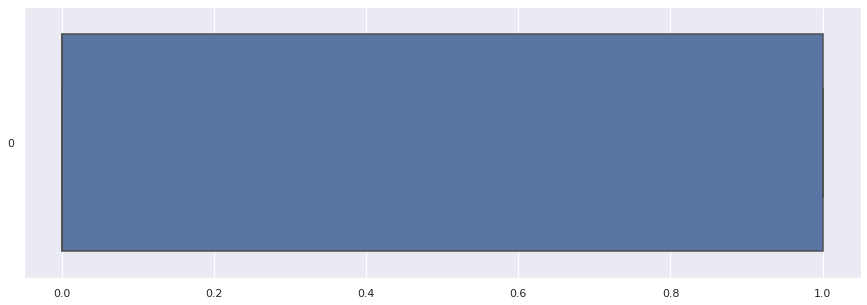

In [36]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['survived'], orient="h")

4.2 Box plot for pclass

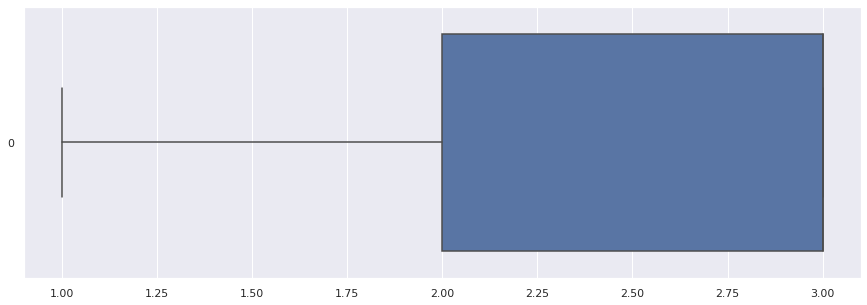

In [37]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['pclass'], orient="h")


4.3 Box plot for age

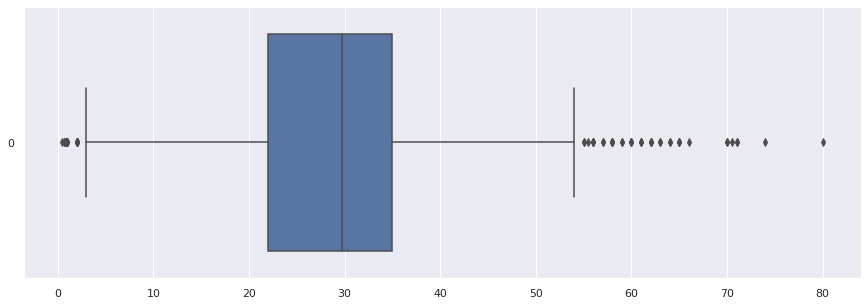

In [38]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")

4.4 Box plot for sibsp

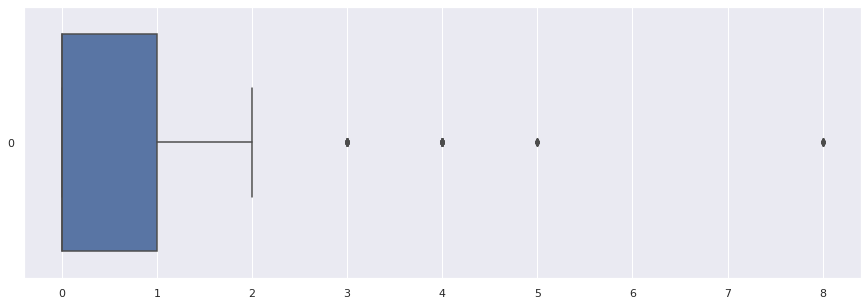

In [39]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['sibsp'], orient="h")

4.5 Box plot for parch

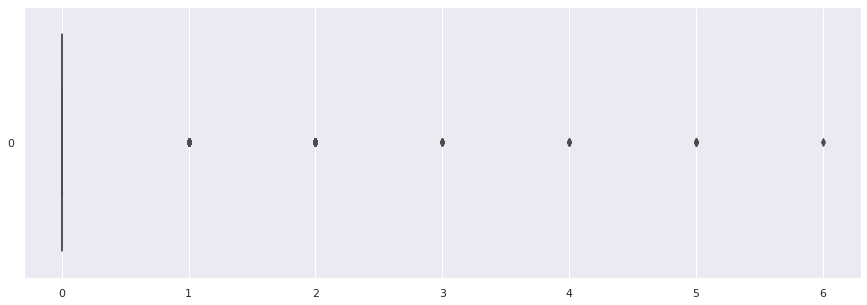

In [40]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['parch'], orient="h")


4.6 Box plot for fare

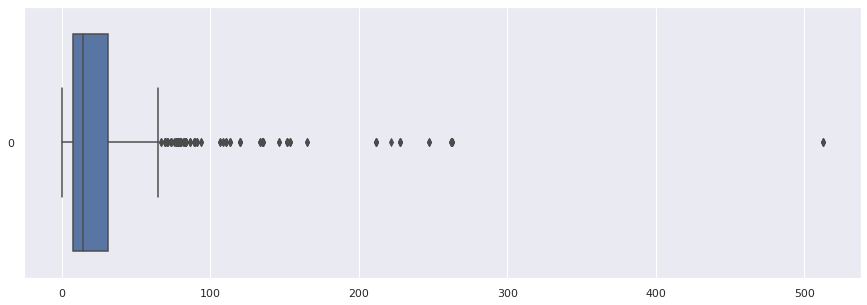

In [41]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['fare'], orient="h")


4.7 Box plot for class

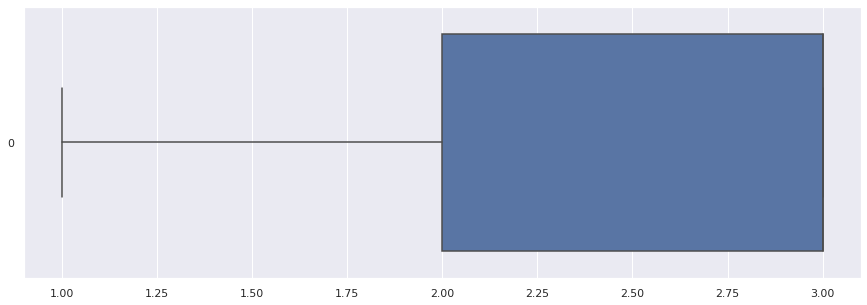

In [42]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['class'], orient="h")


4.8 Box plot for alone

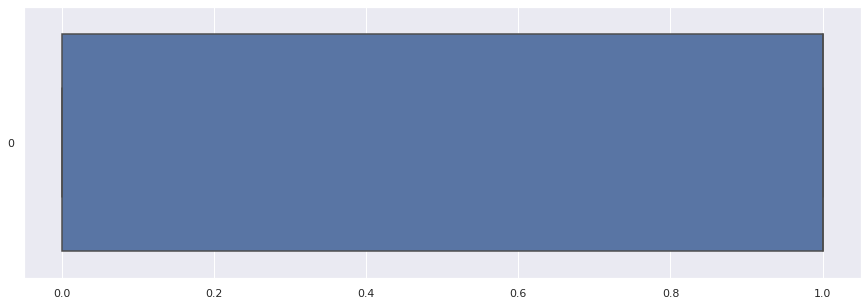

In [43]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['alone'], orient="h")


5.0 Histogram and Distribution
5.1 Histogram and Distribution for survived


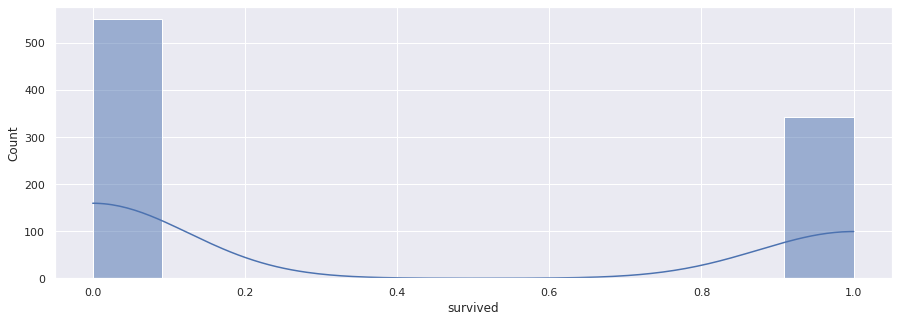

In [44]:
sns.histplot(data=df_numerical['survived'],kde=True)

5.2 Histogram and Distribution for pclass

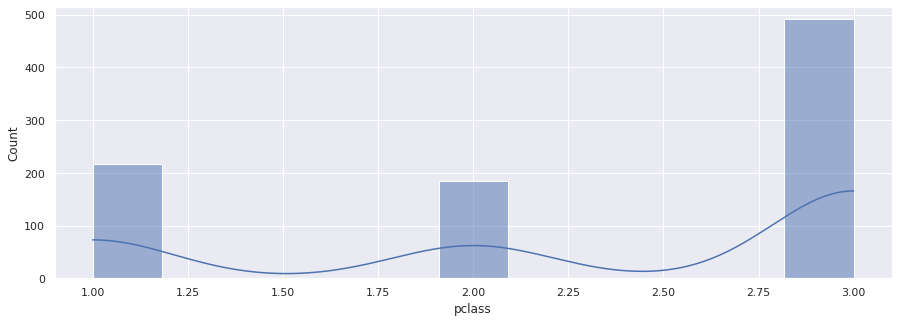

In [45]:
sns.histplot(data=df_numerical['pclass'], kde=True)

5.3 Histogram and Distribution for age


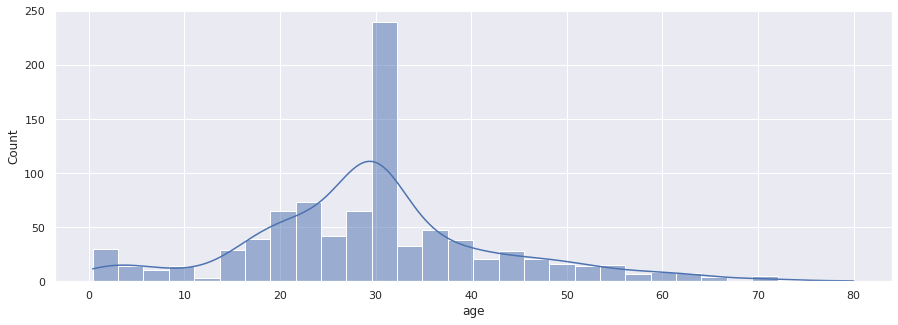

In [46]:
sns.histplot(data=df_numerical['age'], kde=True)

5.4 Histogram and Distribution for sibsp


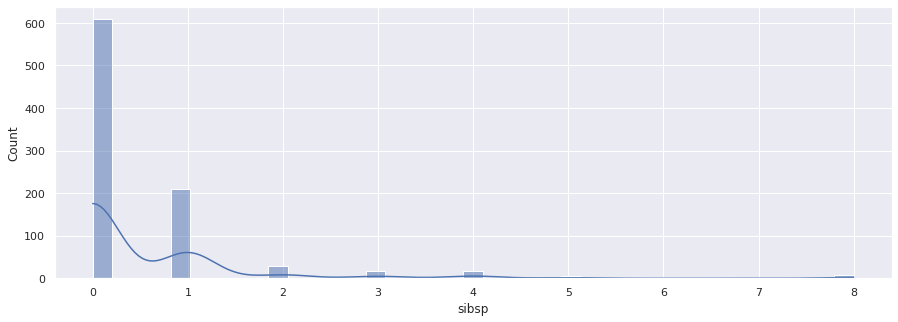

In [47]:
sns.histplot(data=df_numerical['sibsp'], kde=True)

5.5 Histogram and Distribution for parch

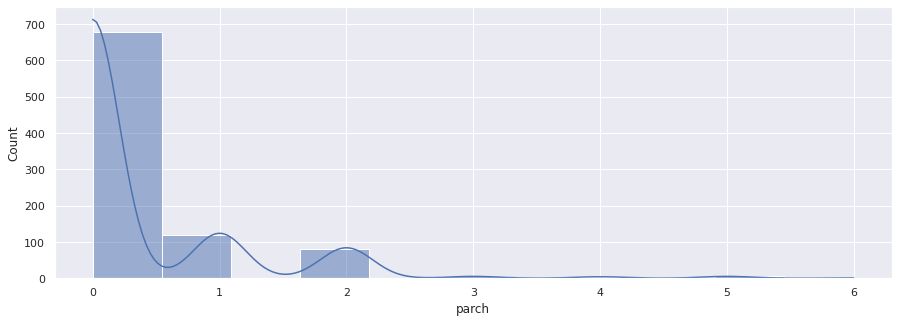

In [48]:
 sns.histplot(data=df_numerical['parch'], kde=True)


5.6 Histogram and Distribution for fare

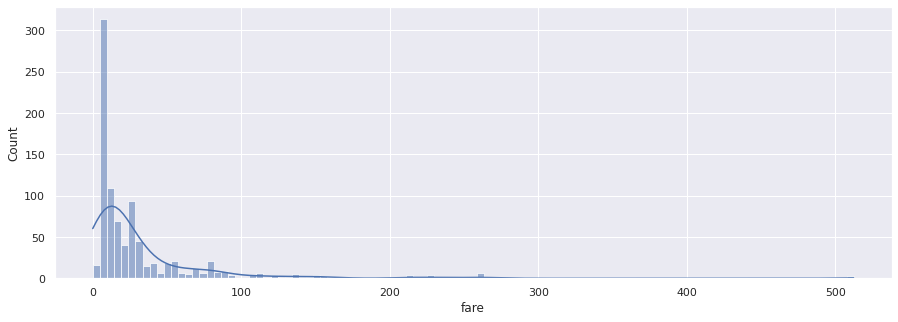

In [49]:
 sns.histplot(data=df_numerical['fare'], kde=True)


5.7 Histogram and Distribution for class

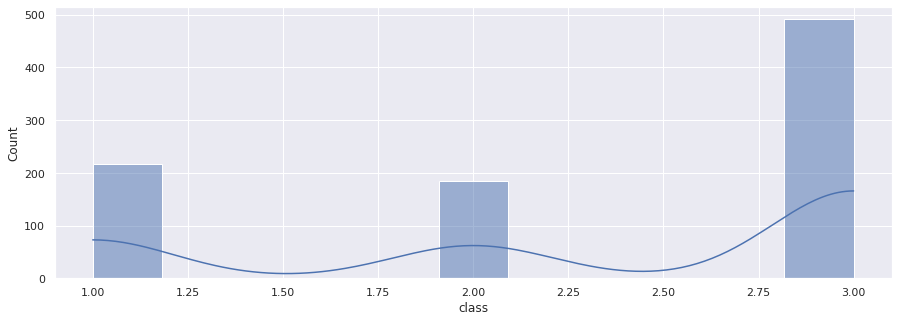

In [50]:
sns.histplot(data=df_numerical['class'], kde=True)


5.8 histogram and distribution for alone

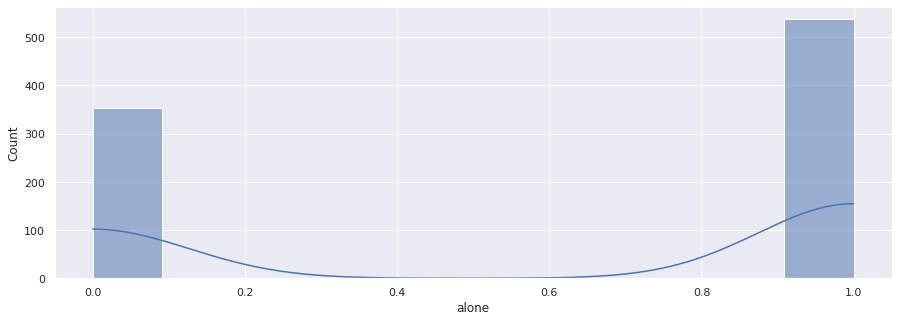

In [51]:
sns.histplot(data=df_numerical['alone'],kde=True)

6.0 Standardization

In [52]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


6.1 standarization of dataset

In [53]:
df_standard=(df_numerical-df_numerical.mean())/df_numerical.std()
df_standard.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,-0.788829,0.826913,-0.592148,0.432550,-0.473408,-0.502163,0.826913,-1.230954
1,1.266279,-1.565228,0.638430,0.432550,-0.473408,0.786404,-1.565228,-1.230954
2,1.266279,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,0.826913,0.811467
3,1.266279,-1.565228,0.407697,0.432550,-0.473408,0.420494,-1.565228,-1.230954
4,-0.788829,0.826913,0.407697,-0.474279,-0.473408,-0.486064,0.826913,0.811467


6.2 mean and standard deviation of standardized dataset

In [55]:
round(df_standard.mean())

survived   -0.0
pclass     -0.0
age         0.0
sibsp       0.0
parch       0.0
fare       -0.0
class      -0.0
alone      -0.0
dtype: float64

In [56]:
df_standard.std()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

6.3 kde plot of original dataset

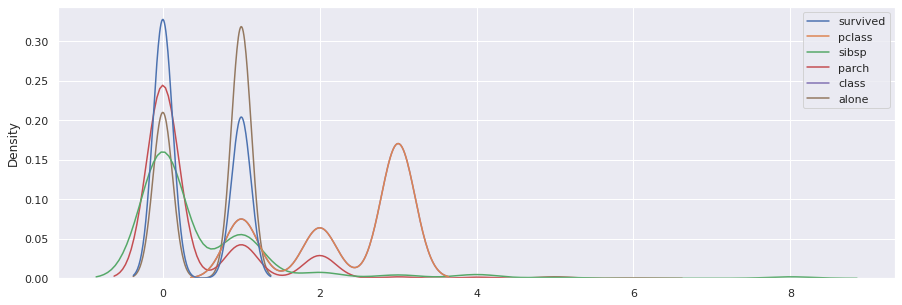

In [57]:
sns.kdeplot(data=df_numerical[['survived','pclass','sibsp','parch','class','alone']])

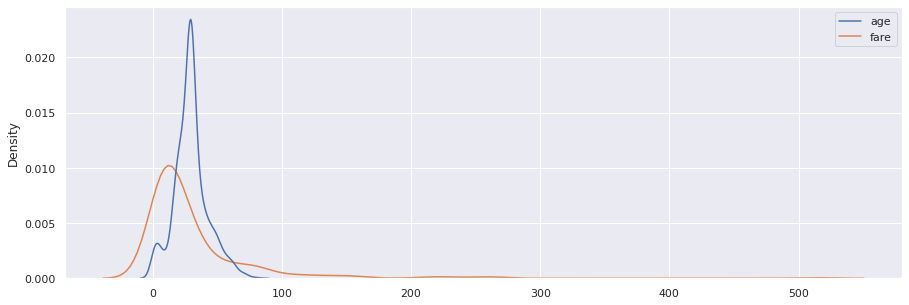

In [59]:
sns.kdeplot(data=df_numerical[['age', 'fare']])


6.4 kde plot of standardized dataset

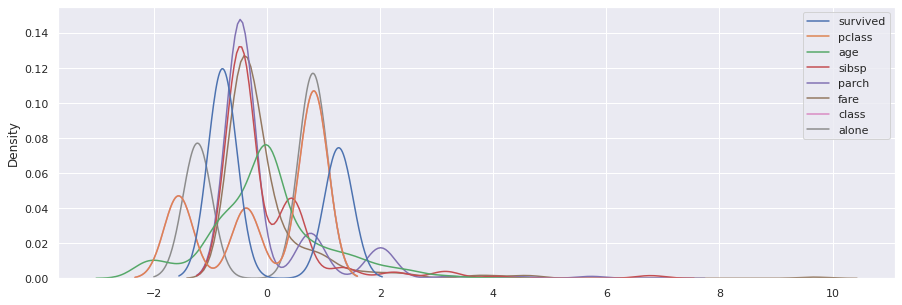

In [60]:
sns.kdeplot(data=df_standard)


7.0 Normalization

Using MinMax Scalar
Note: using MinMax Scalar the data range will be 0 to 1.


In [61]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


7.1 normalization of dataset

In [62]:
df_normal = (df_numerical - df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_normal.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


7.2 min, max, mean and standard deviation of normalized dataset

In [63]:

df_normal.min()

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [64]:
df_normal.max()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

In [65]:
df_normal.mean()


survived    0.383838
pclass      0.654321
age         0.367921
sibsp       0.065376
parch       0.063599
fare        0.062858
class       0.654321
alone       0.602694
dtype: float64

In [66]:
df_normal.std()

survived    0.486592
pclass      0.418036
age         0.163383
sibsp       0.137843
parch       0.134343
fare        0.096995
class       0.418036
alone       0.489615
dtype: float64

7.3 kde plot of original dataset

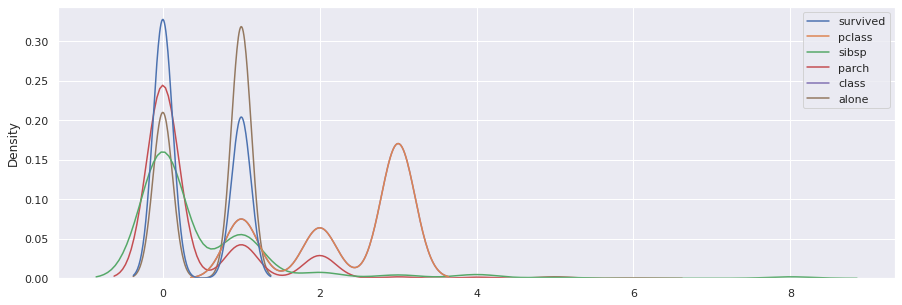

In [67]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
 'alone']])


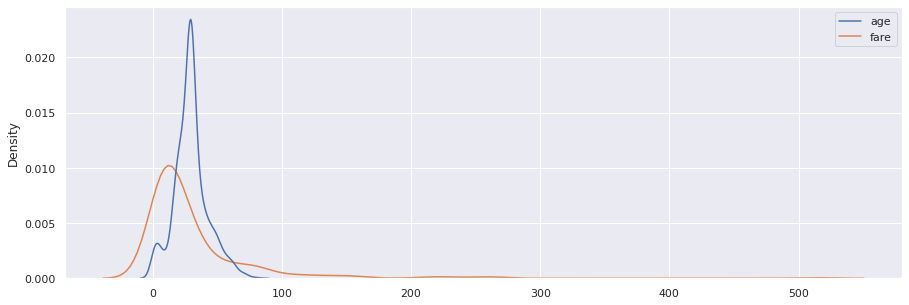

In [68]:
sns.kdeplot(data=df_numerical[['age', 'fare']])


7.4 kde plot of normalized dataset

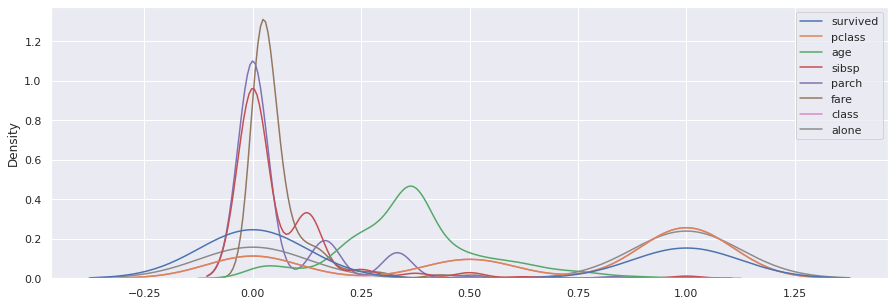

In [69]:
sns.kdeplot(data=df_normal)


8.0 Central Limit Theorem

The Central Limit Theorem(CLT) states that for any data, provided a high number
of samples have been taken. The following properties hold:


1. Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
2. Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
3. For n > 30, the sampling distribution becomes a normal distribution.


In [70]:
df_numerical.head()


,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


8.1 For survived column

8.1.1 Population Mean and Standard Deviation


In [75]:
mean_pop_survived = df_numerical['survived'].mean()
std_pop_survived = df_numerical['survived'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_survived,std_pop_survived))

population mean (μ): 0.3838383838383838
population standard deviation (σ): 0.4865924542648575


8.1.2 histplot


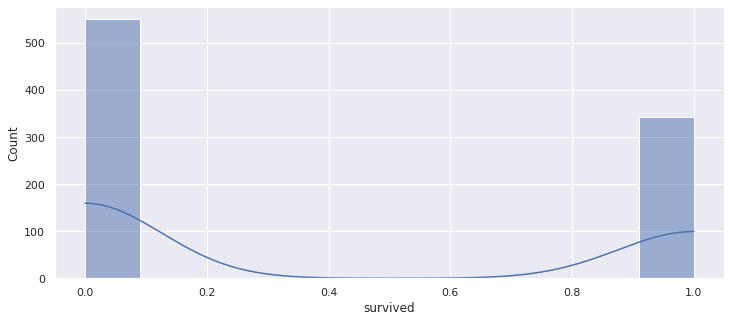

In [76]:
 sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['survived'], kde=True)

8.1.3 Verifying CLT


8.1.3.1 Keeping No. of Samples Constant


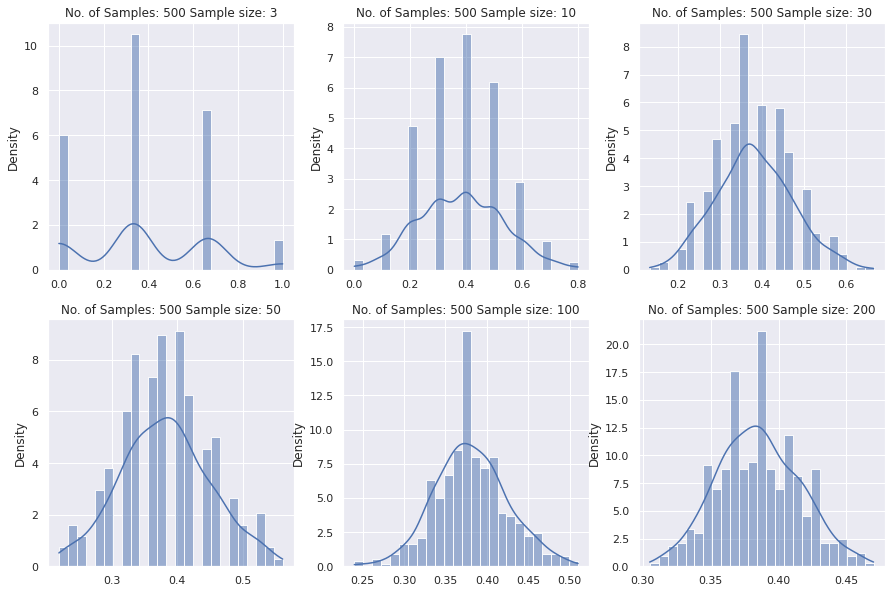

In [79]:

sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [80]:
for i in list_sample_means:
 print(pd.Series(i).mean())


0.3846666666666666
0.38219999999999993
0.3825333333333333
0.38156
0.38089999999999996
0.38500999999999996


8.1.3.2 Keeping Samples Size Constant

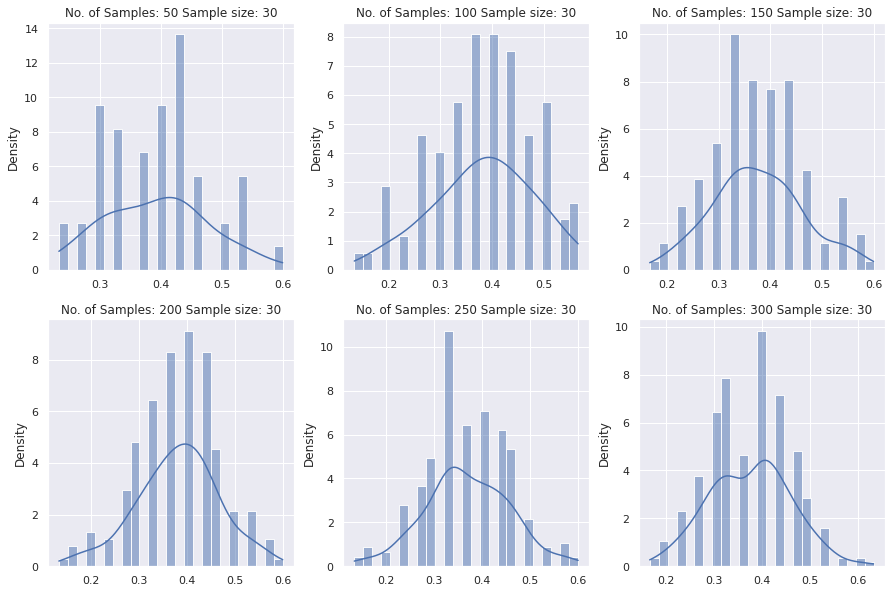

In [81]:

sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [82]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.3933333333333333
0.38299999999999995
0.3766666666666666
0.38183333333333336
0.3690666666666667
0.37622222222222224


8.2 For pclass column


8.2.1 Population Mean and Standard Deviation


In [84]:
mean_pop_pclass = df_numerical['pclass'].mean()
std_pop_pclass = df_numerical['pclass'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_pclass,std_pop_pclass))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.836071240977049


8.2.2 histplot

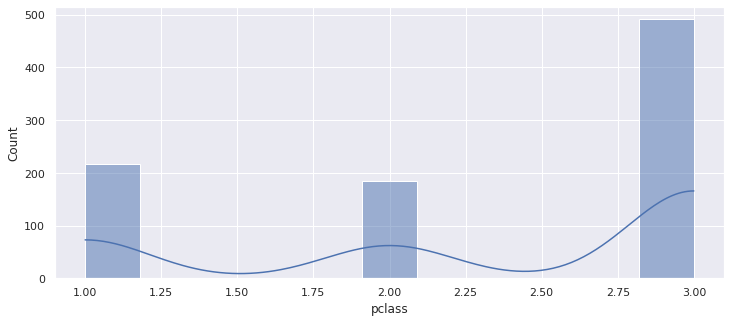

In [85]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['pclass'], kde=True)


8.2.3 Verifying CLT

8.2.3.1 Keeping No. of Samples Constant

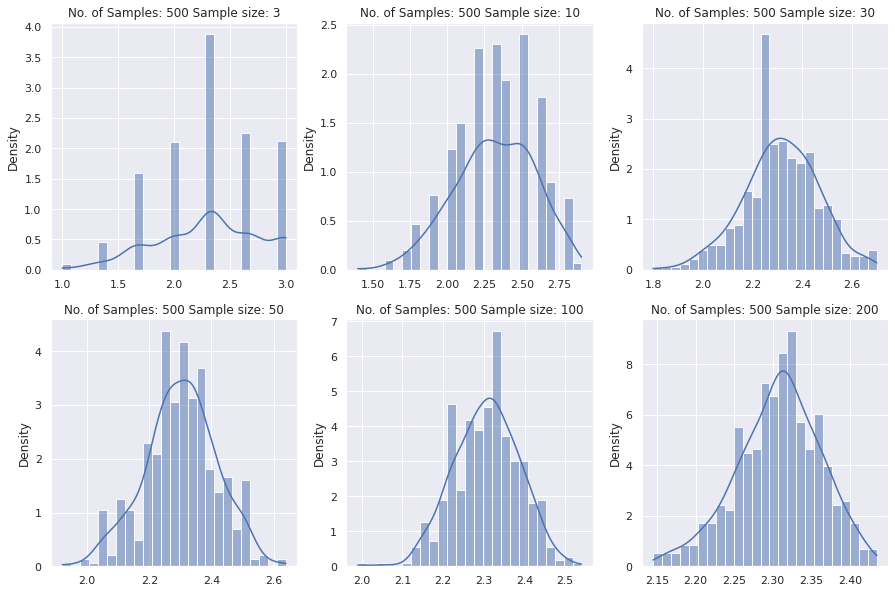

In [86]:

sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))


In [87]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.318666666666667
2.3188
2.3145333333333333
2.3017199999999995
2.3066199999999997
2.30766


8.2.3.2 Keeping Samples Size Constant

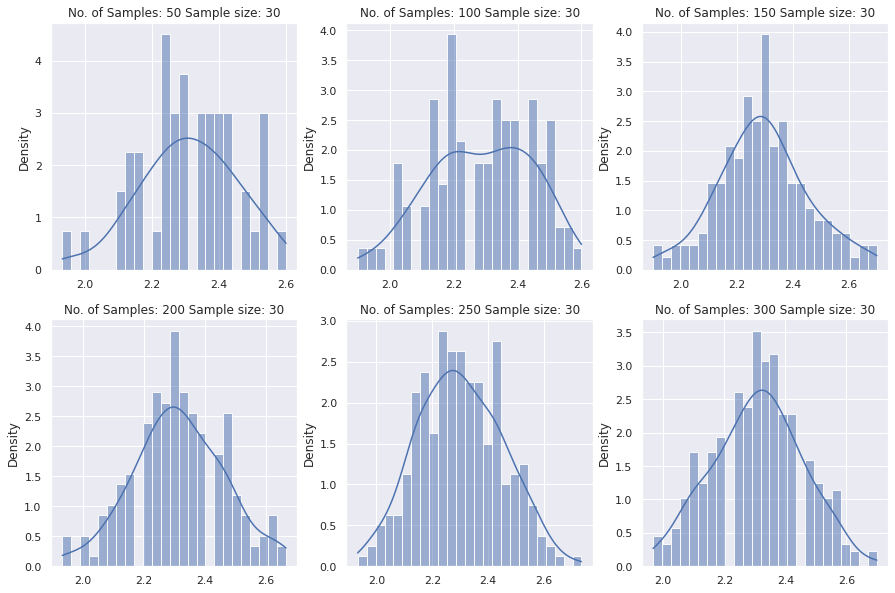

In [88]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [89]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.3100000000000005
2.287666666666667
2.2939999999999996
2.315
2.2997333333333336
2.3088888888888888


8.3 For age column

8.3.1 Population Mean and Standard Deviation

In [90]:
mean_pop_age = df_numerical['age'].mean()
std_pop_age = df_numerical['age'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_age,std_pop_age))

population mean (μ): 29.69911764705882
population standard deviation (σ): 13.002015226002882


8.3.2 histplot

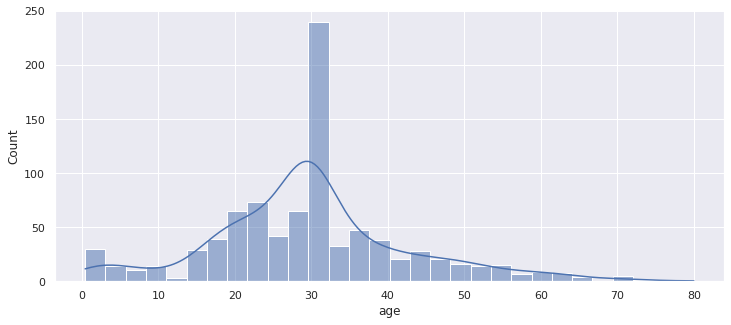

In [91]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['age'], kde=True)

8.3.3 Verifying CLT

8.3.3.1 Keeping No. of Samples Constant


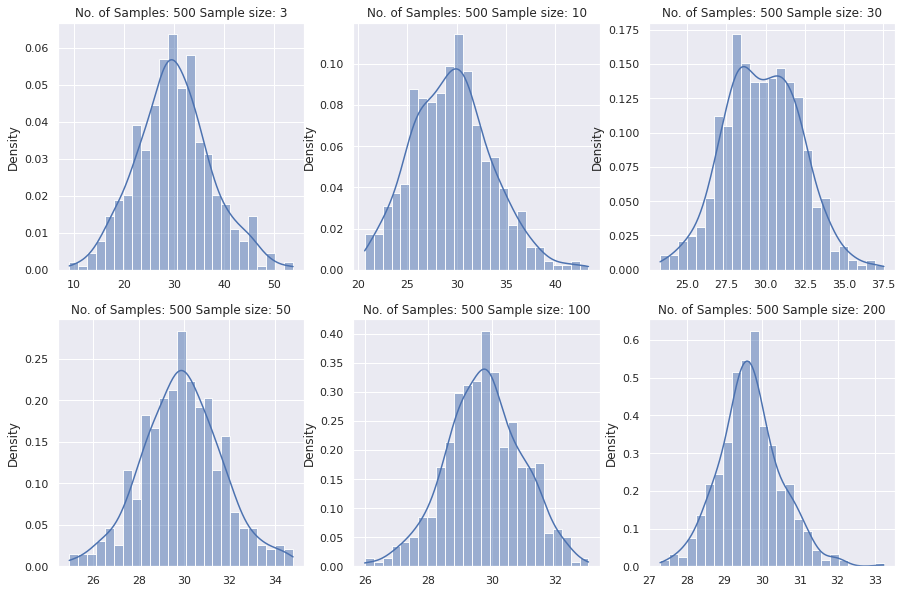

In [92]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [93]:

for i in list_sample_means:
 print(pd.Series(i).mean())

29.97821019607843
29.49769552941176
29.796138078431373
29.905155329411762
29.754122305882348
29.67778458823529


8.3.3.2 Keeping Samples Size Constant 

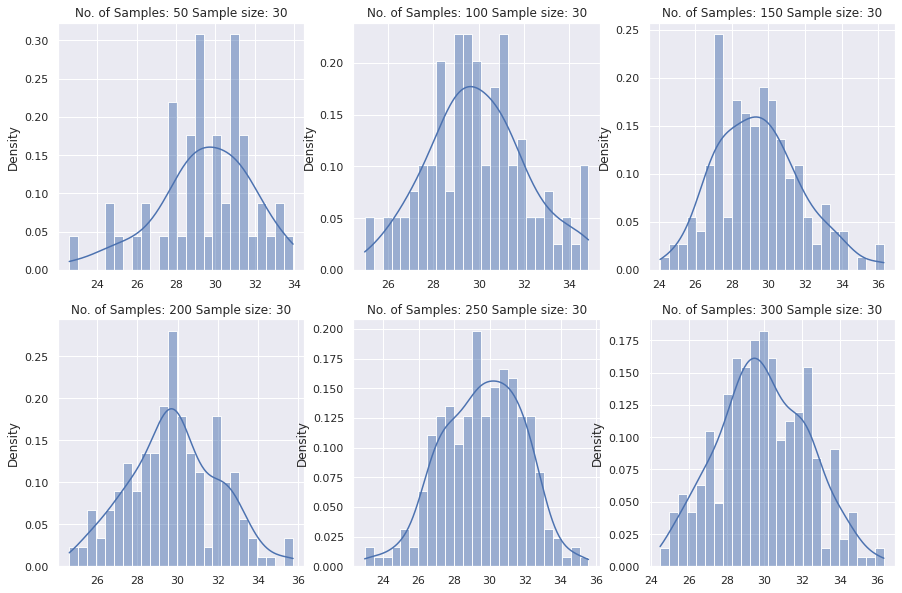

In [94]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))


In [95]:
for i in list_sample_means:
 print(pd.Series(i).mean())


29.44995254901961
29.950293431372543
29.431069542483662
29.821907647058826
29.598360274509805
29.929678300653602


8.4 For sibsp column

8.4.1 Population Mean and Standard Deviation


In [96]:
mean_pop_sibsp = df_numerical['sibsp'].mean()
std_pop_sibsp = df_numerical['sibsp'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_sibsp,std_pop_sibsp))


population mean (μ): 0.5230078563411896
population standard deviation (σ): 1.1027434322934317


8.4.2 histplot

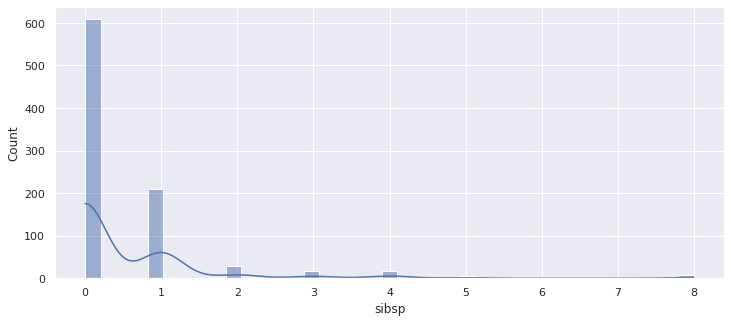

In [97]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['sibsp'], kde=True)


8.4.3 Verifying CLT

8.4.3.1 Keeping No. of Samples Constant


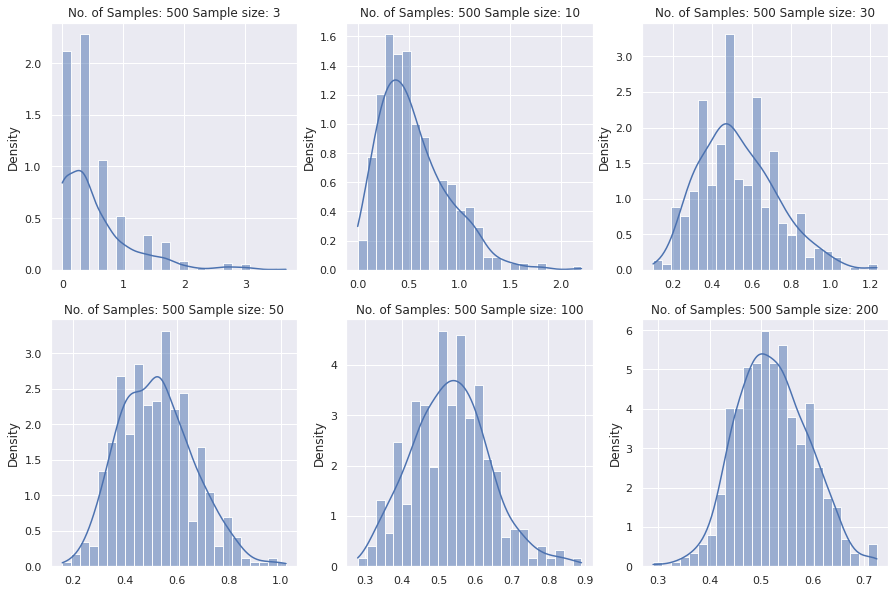

In [98]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [99]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.5113333333333333
0.542
0.5296
0.52148
0.5330199999999999
0.5220699999999999


8.4.3.2 Keeping Samples Size Constant 

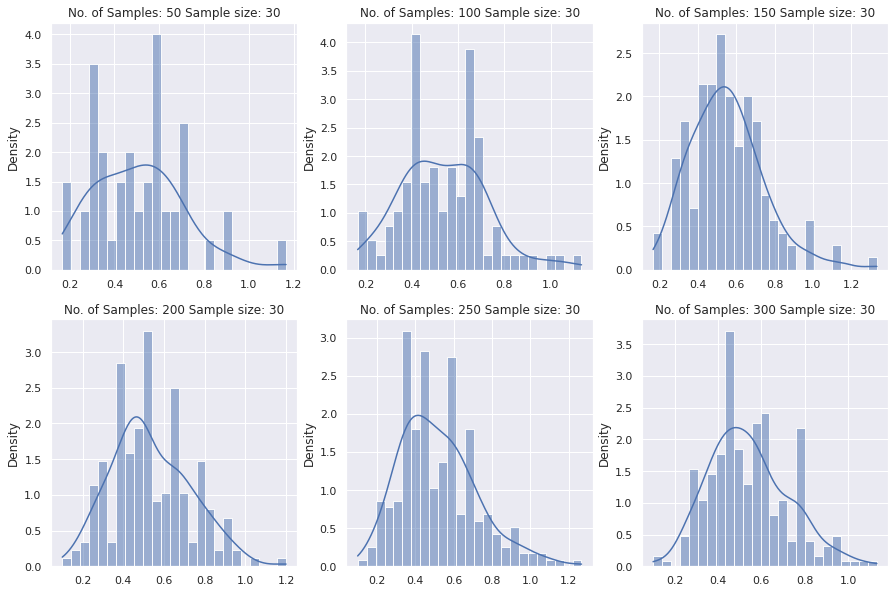

In [100]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [101]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.5073333333333333
0.537
0.5522222222222221
0.5355
0.5192
0.5393333333333333


8.5 For parch column

8.5.1 Population Mean and Standard Deviation

In [102]:
mean_pop_parch = df_numerical['parch'].mean()
std_pop_parch = df_numerical['parch'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_parch,std_pop_parch))


population mean (μ): 0.38159371492704824
population standard deviation (σ): 0.8060572211299483


8.5.2 histplot


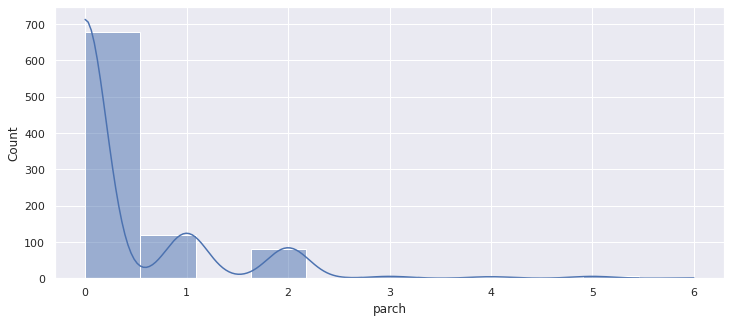

In [103]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['parch'], kde=True)


8.5.3 Verifying CLT

8.5.3.1 Keeping No. of Samples Constant


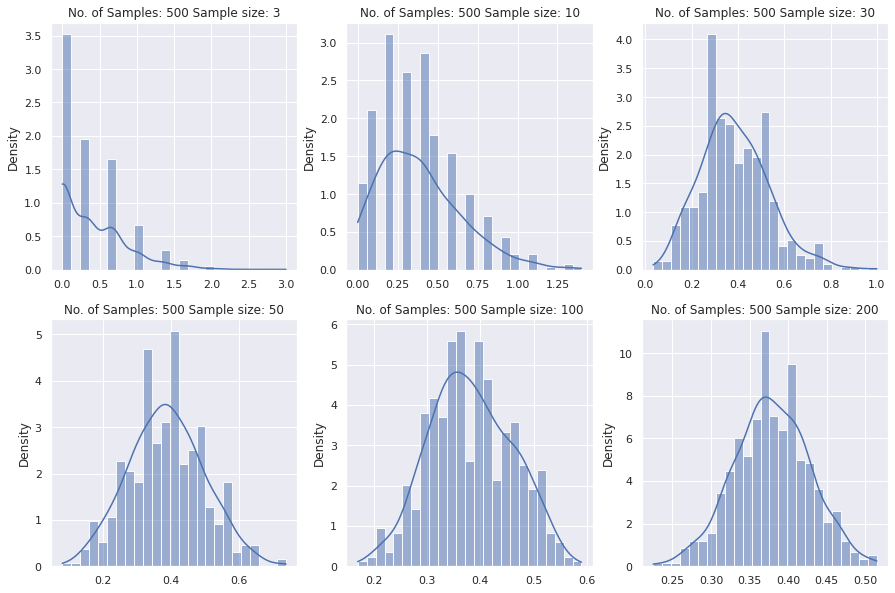

In [104]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [105]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.396
0.38439999999999996
0.3844666666666666
0.38739999999999997
0.38201999999999997
0.3788


8.5.3.2 Keeping Samples Size Constant

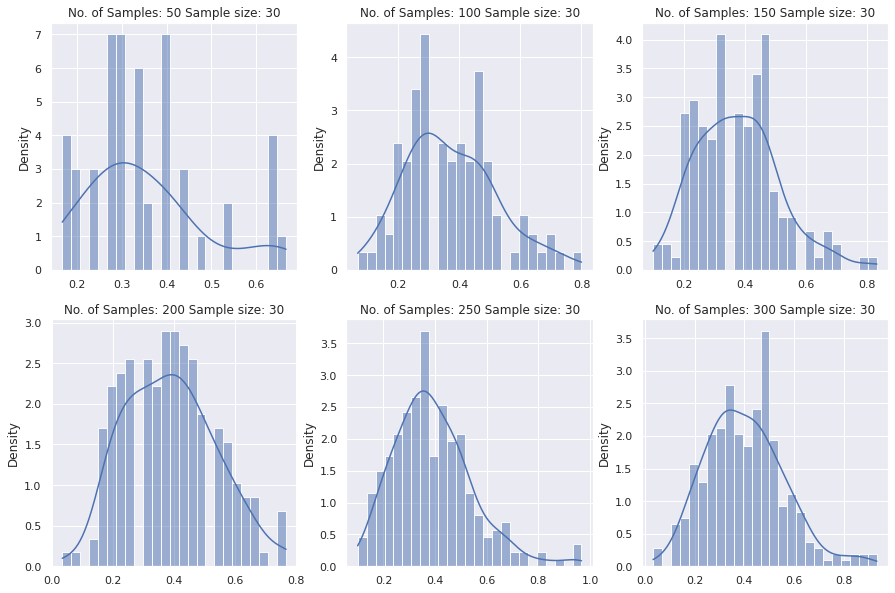

In [106]:

sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [107]:
for i in list_sample_means:
 print(pd.Series(i).mean())


0.3499999999999999
0.37166666666666665
0.3771111111111111
0.3875
0.39293333333333336
0.4023333333333333


8.6 for fare column

8.6.1 Population Mean and Standard Deviation

In [108]:
mean_pop_fare = df_numerical['fare'].mean()
std_pop_fare = df_numerical['fare'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_fare,std_pop_fare))

population mean (μ): 32.204207968574636
population standard deviation (σ): 49.6934285971809


8.6.2 histplot

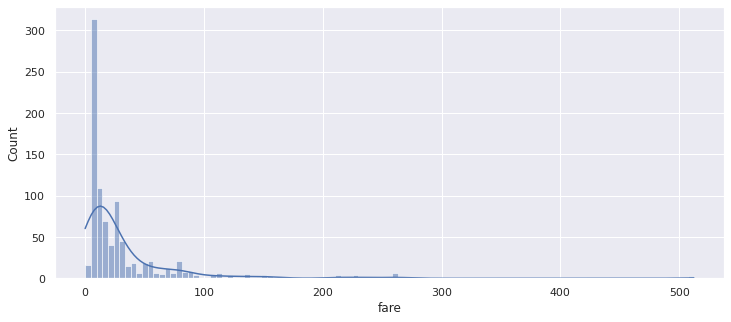

In [109]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['fare'], kde=True)


8.6.3 Verifying CLT

8.6.3.1 Keeping No. of Samples Constant

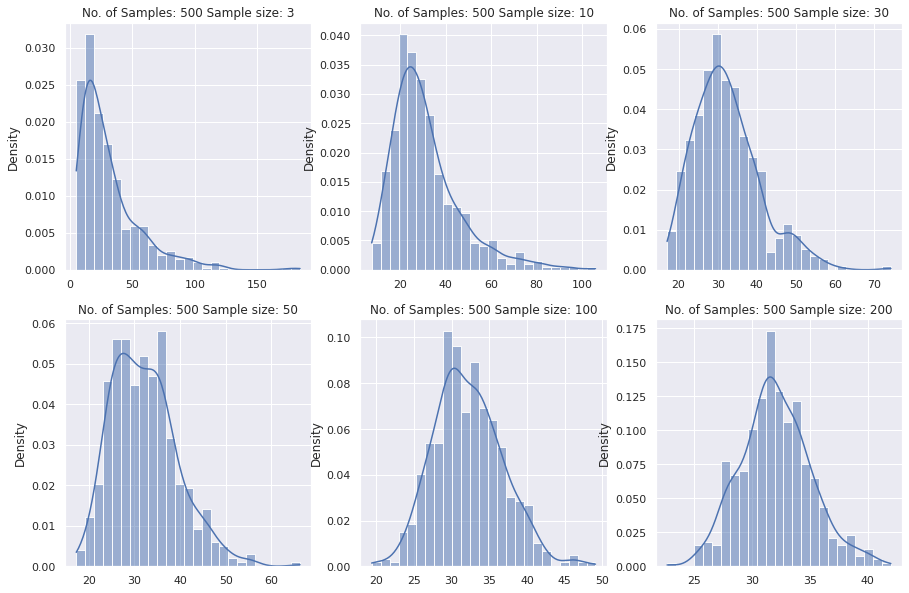

In [110]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))


In [111]:
for i in list_sample_means:
 print(pd.Series(i).mean())

30.997007533333335
31.222794959999998
32.34131133333333
32.238912195999994
32.21443583800001
32.05400821


8.6.3.2 Keeping Samples Size Constant

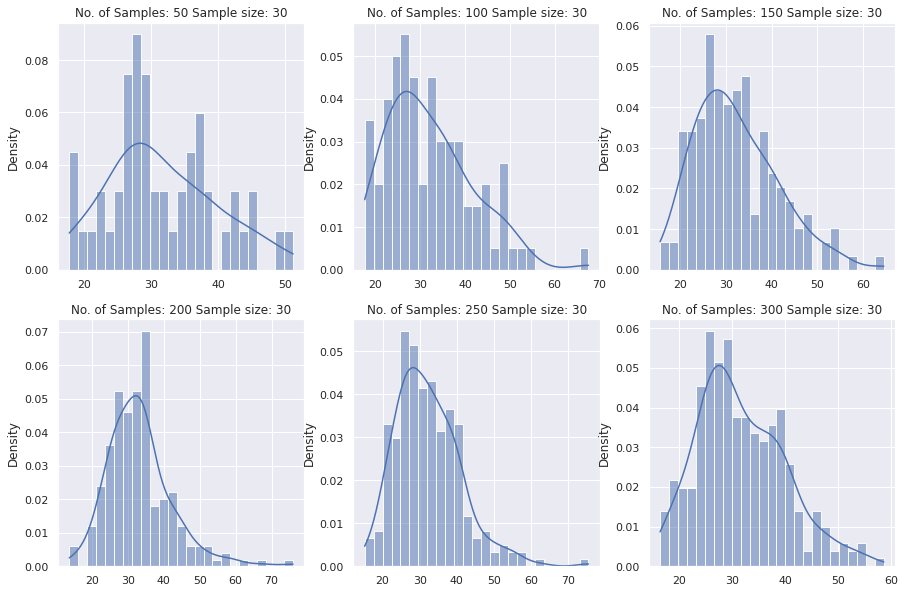

In [113]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [114]:

for i in list_sample_means:
 print(pd.Series(i).mean())


31.66537386666667
32.083514466666664
32.24638904444445
33.2243995
32.266003133333335
31.706471844444447


8.7 for class column

8.7.1 Population Mean and Standard Deviation

In [115]:
mean_pop_class = df_numerical['class'].mean()
std_pop_class = df_numerical['class'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_class,std_pop_class))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.836071240977049


8.7.2 histplot


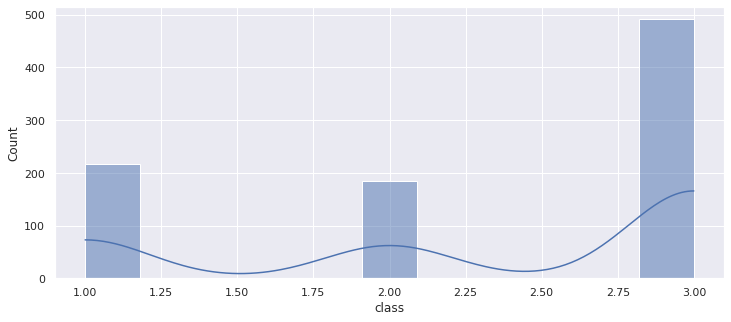

In [116]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['class'], kde=True)

8.7.3 Verifying CLT

8.7.3.1 Keeping No. of Samples Constant


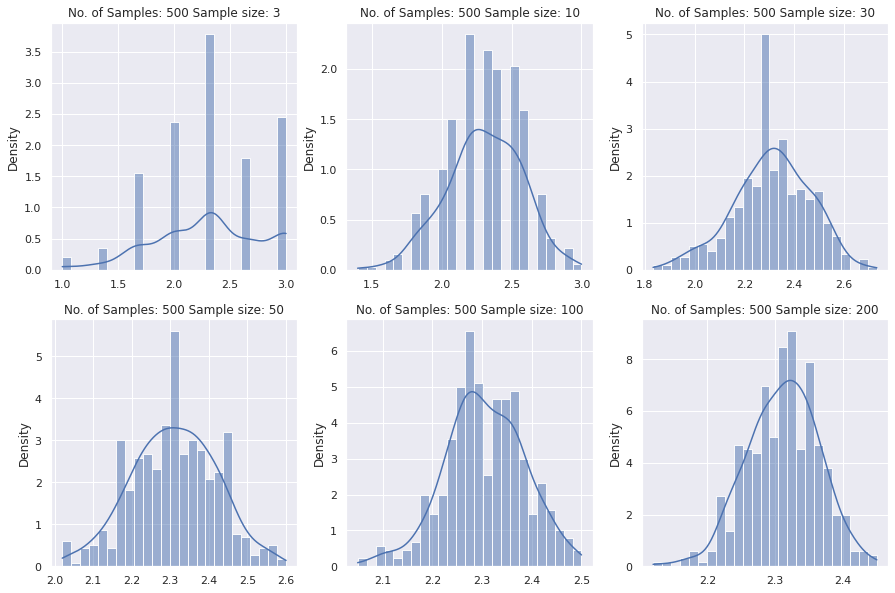

In [117]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [118]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.316666666666667
2.3055999999999996
2.311
2.30992
2.30504
2.3113


8.7.3.2 Keeping Samples Size Constant 

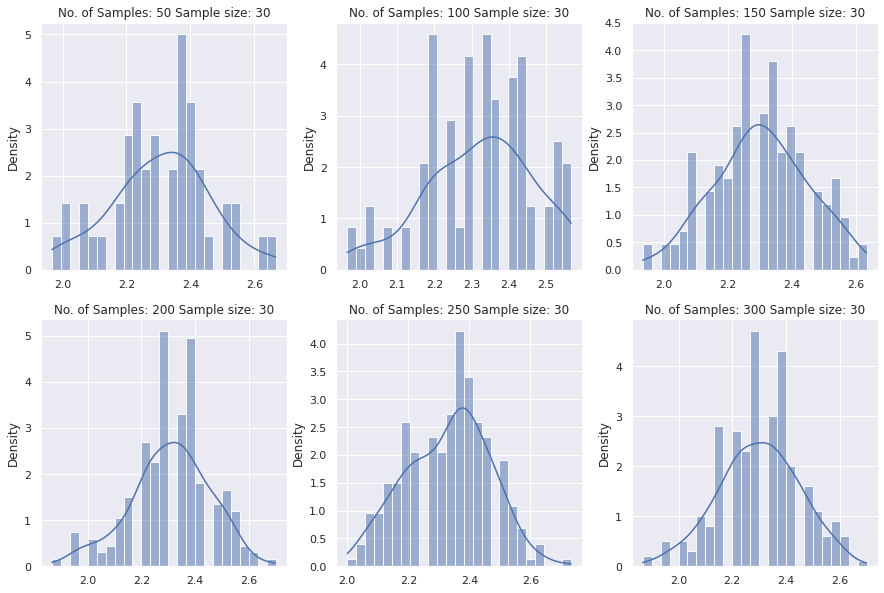

In [119]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [122]:
 for i in list_sample_means:
      print(pd.Series(i).mean())
   

2.3066666666666666
2.3209999999999997
2.304222222222222
2.307
2.329733333333333
2.299555555555556


8.8 for alone column


8.8.1 Population Mean and Standard Deviation

In [123]:
mean_pop_alone = df_numerical['alone'].mean()
std_pop_alone = df_numerical['alone'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_alone,std_pop_alone))

population mean (μ): 0.6026936026936027
population standard deviation (σ): 0.4896152299826248


8.8.2 histplot

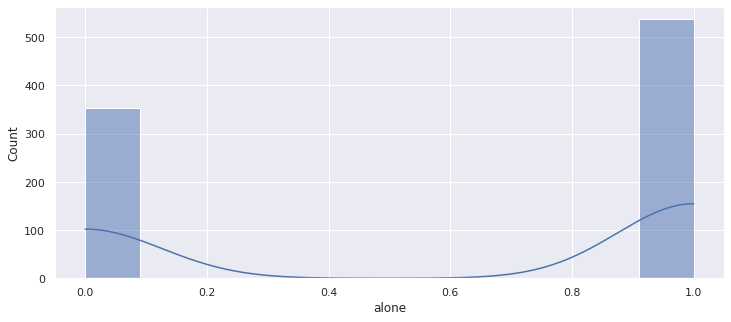

In [124]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['alone'], kde=True)


8.8.3 Verifying CLT

8.8.3.1 Keeping No. of Samples Constant

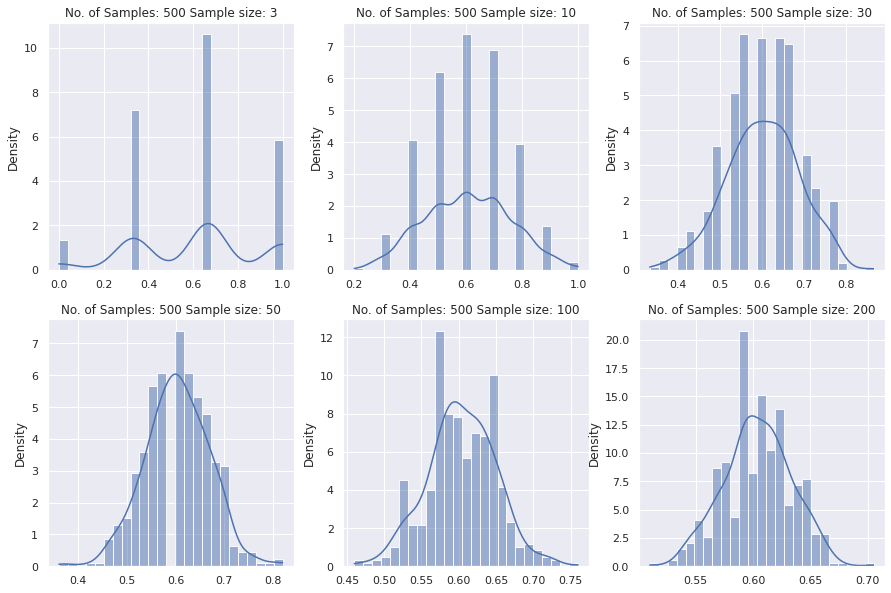

In [125]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [126]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.6126666666666667
0.6062
0.6028
0.6033200000000001
0.60372
0.6039200000000001


8.8.3.2 Keeping Samples Size Constant

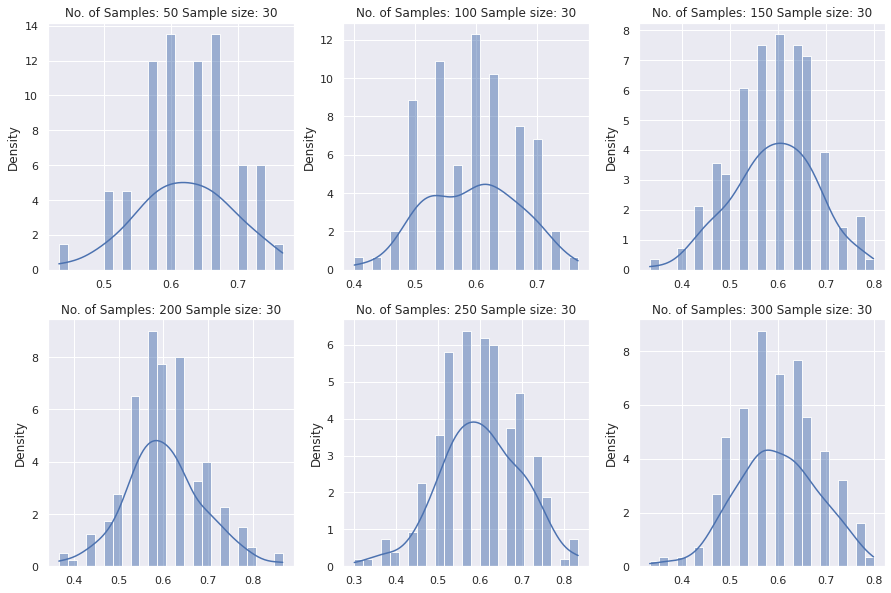

In [127]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [128]:
 for i in list_sample_means:
     print(pd.Series(i).mean())


0.6206666666666667
0.594
0.5931111111111111
0.602
0.6015999999999999
0.5995555555555556


9.0 Covariance, Pearson correlation coefficient, Spearman's rank
correlation coefficient

9.1 Covarience

In [129]:
df_numerical.cov()

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787,-0.137703,-0.048451
pclass,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
age,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200,-3.601855,1.144445
sibsp,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734,0.076599,-0.315568
parch,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052,0.012429,-0.230242
fare,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846,-22.830196,-6.613861
class,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
alone,-0.048451,0.055347,1.144445,-0.315568,-0.230242,-6.613861,0.055347,0.239723


9.2 Pearson correlation coefficient

In [130]:
df_numerical.corr("pearson")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.338481,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.331339,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.083081,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.018443,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.549500,-0.271832
class,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.135207,1.000000


9.3 Spearman's rank correlation coefficient

In [131]:
df_numerical.corr("spearman")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736,-0.339668,-0.203367
pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847,-0.308875,0.141379
sibsp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113,-0.043019,-0.828215
parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074,-0.022801,-0.683719
fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000,-0.688032,-0.531472
class,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
alone,-0.203367,0.135896,0.141379,-0.828215,-0.683719,-0.531472,0.135896,1.000000


9.4 Pairplot for titanic dataset

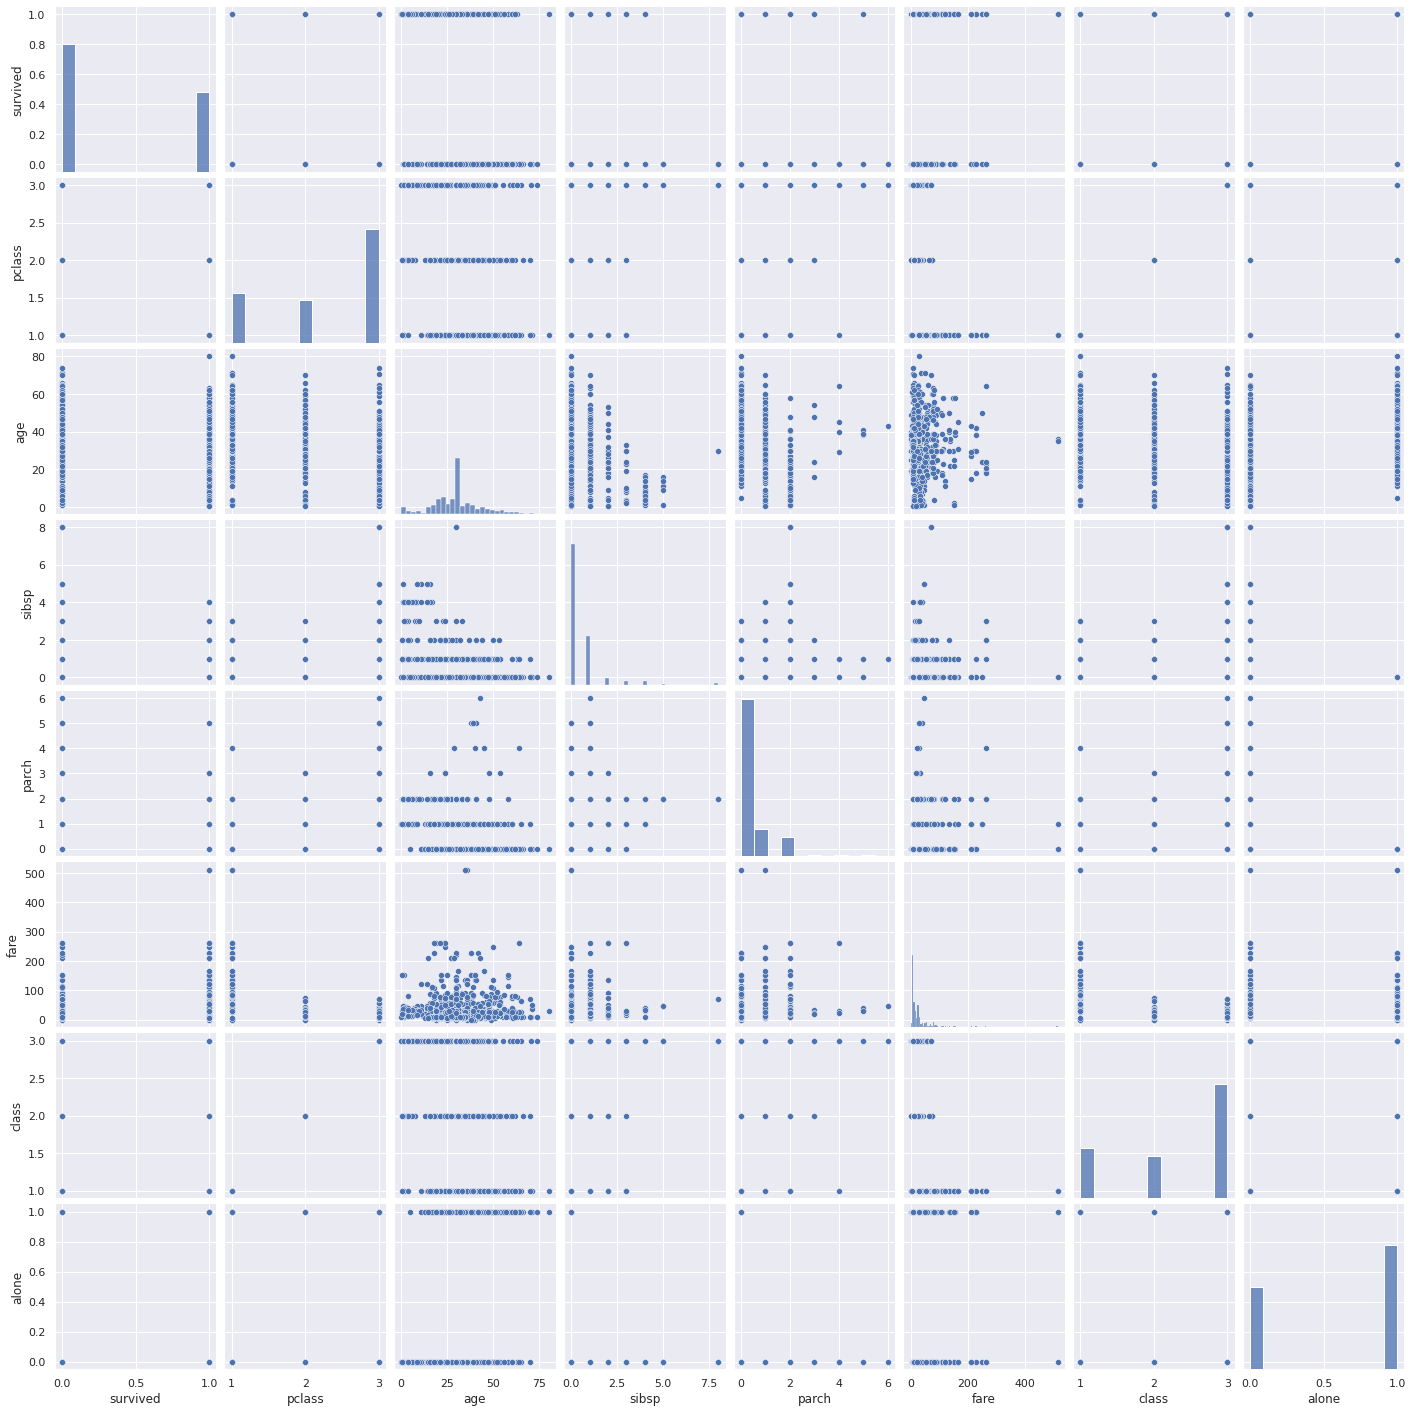

In [132]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5)


9.5 Pairplot for titanic dataset with kde

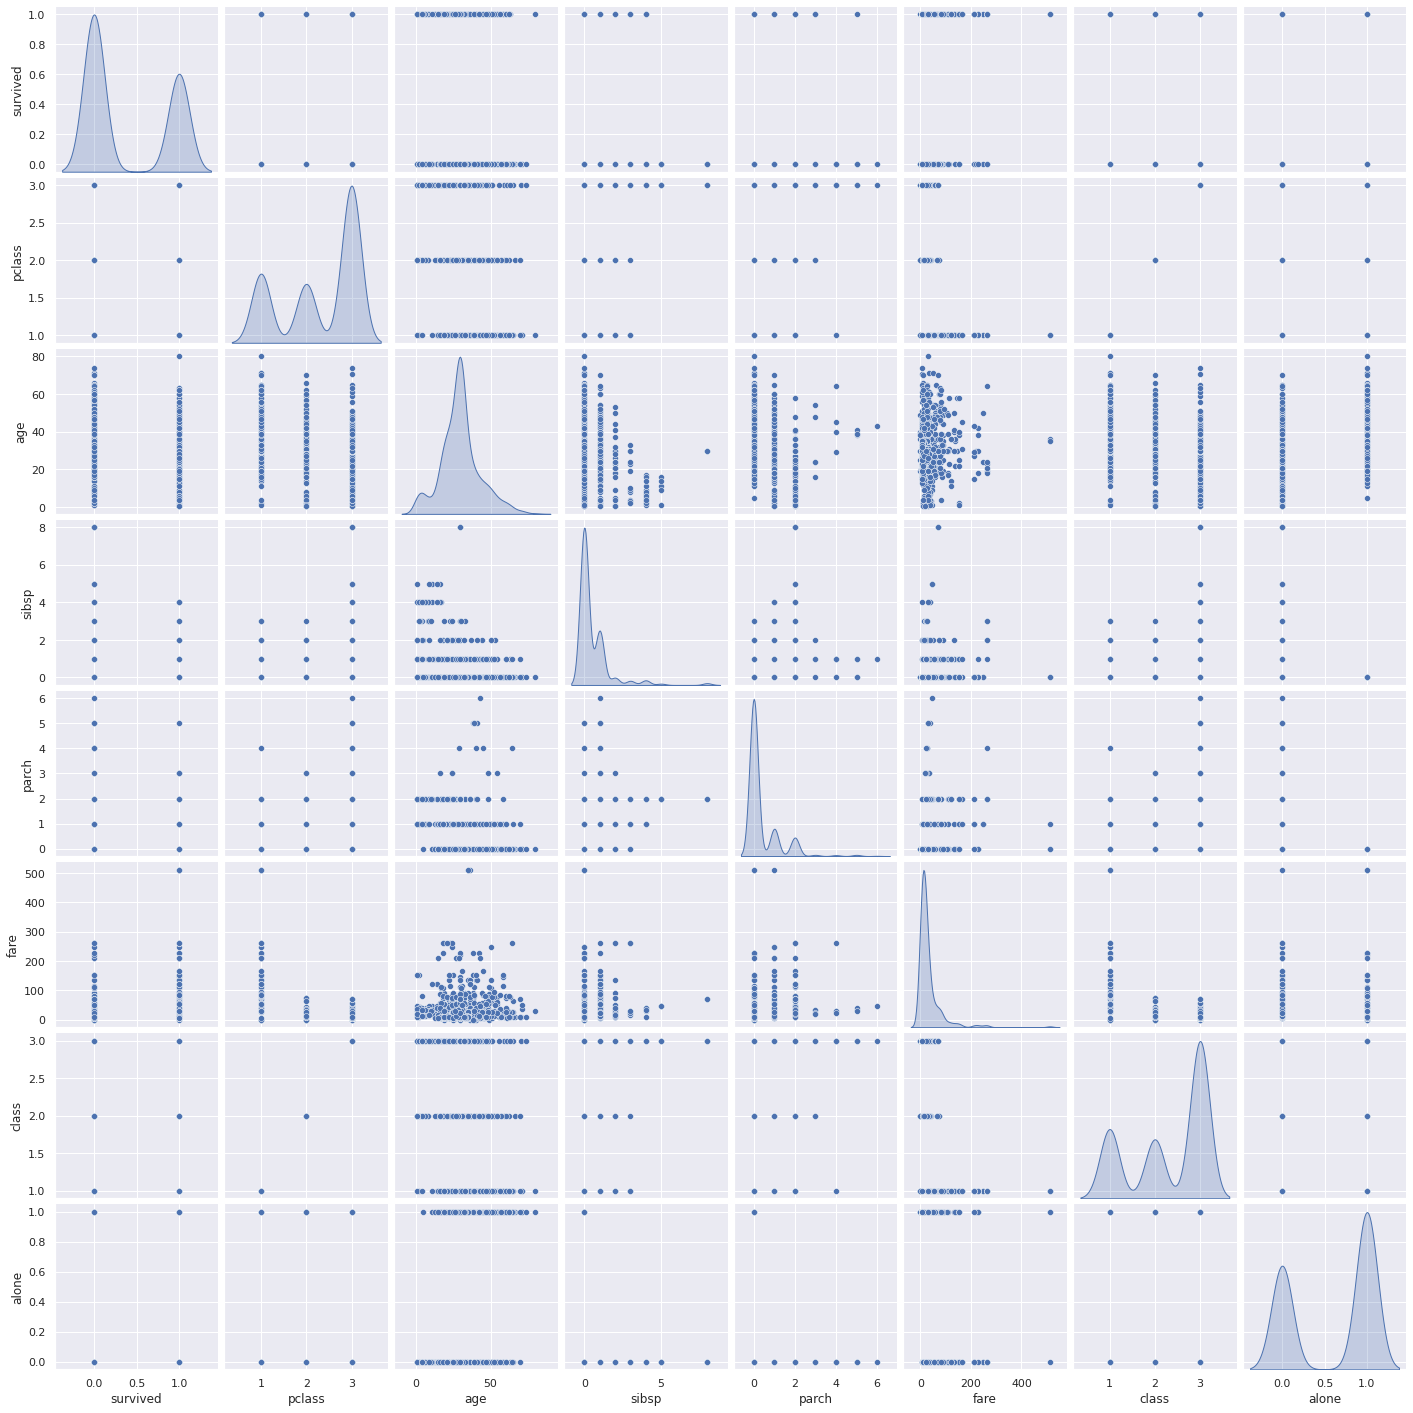

In [133]:
 sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5,diag_kind="kde")


10.0 Hypothesis testing

10.1 z-Test

In [134]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


In [135]:
# population mean
pop_mean_fare=df_numerical['fare'].mean()
pop_mean_fare

32.204207968574636

In [137]:
 # population standard deviation
pop_std_fare=df_numerical['fare'].std()
pop_std_fare

49.6934285971809

In [138]:
import random
import math


In [139]:
# sampling data and calculating sample mean and standard deviation
random.seed(77)
sample_fare=pd.Series(random.sample(list(df_numerical['fare']), 80))
sample_mean_fare=sample_fare.mean()
sample_mean_fare


37.59453125

In [140]:
sample_std_fare=sample_fare.std()
sample_std_fare


66.25722719381302

Question #1

For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is conducted to check the accuracy of
fares, randomly 80 samples were taken and its mean was found out to be 37.761250000000004.


1. State null and alternate hypothesis

2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.

Ans:
Step1: Stating Hypothesis

step1: Stating Hypothesis
1. Ho = The mean of the fare is accurate.
2. h1 = The mean of the fare is not accurate.
The problem is related to two tailed test.


Step2: Decision Boundary


In [142]:
CI = 0.95
alpha = 0.05
decision_boundary_lower_fare= -1.96 # from z table for alpha = 0.025, since two tailed test
decision_boundary_upper_fare= 1.96

Step3: Test Statistic

In [143]:
 z_statistic_fare = (sample_mean_fare-pop_mean_fare)/(pop_std_fare/math.sqrt(80))
z_statistic_fare

0.9701990478999167

In [145]:
def Hypothesis_checker(db_upper, db_lower, test_statistic):
 if test_statistic > db_lower and test_statistic < db_upper:
      return "Null Hypothesis cannot be rejected"
 else:
      return "Null Hypothesis is rejected"


Step4: Conclusions

In [146]:
Hypothesis_checker(decision_boundary_upper_fare,decision_boundary_lower_fare,z_statistic_fare)

'Null Hypothesis cannot be rejected'

10.2 t-Test

In [147]:
 # sampling data and calculating sample mean and standard deviation
random.seed(7)
sample_fare1=pd.Series(random.sample(list(df_numerical['fare']), 25))
sample_mean_fare1=sample_fare.mean()
sample_mean_fare1


37.59453125

In [148]:
sample_std_fare1=sample_fare.std()
sample_std_fare1


66.25722719381302

Question #2

For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is conducted to check the accuracy of
fares, randomly 25 samples were taken and its mean was found out to be 37.59453124999999 and standard deviation is
66.25722719381305.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.


Ans:
1. since n<30 and sample standard deviation is given, hence using t-Test. It is two tailed test.

Step1: Stating Hypothesis

1. Ho = The mean of the fare is accurate.
2. h1 = The mean of the fare is not accurate.
The problem is related to two tailed test.

Step2: Decision Boundary

In [149]:
 total_sample_size_fare1 = 25
CI = 0.95
alpha = 0.05
dof_t = 24 # degree of freedom is no of samples minus one.
decision_boundary_lower_fare1= -2.064 # from t table for alpha = 0.025 (since two tailed test) and dof = 24.
decision_boundary_upper_fare1= 2.064

Step3: Test Statistic

In [150]:
 t_statistic_fare1 = (sample_mean_fare1-pop_mean_fare)/(sample_std_fare1/math.sqrt(total_sample_size_fare1))
t_statistic_fare1


0.40677247673358

Step4: Conclusions

In [151]:
Hypothesis_checker(decision_boundary_upper_fare1,decision_boundary_lower_fare1,t_statistic_fare1)

'Null Hypothesis cannot be rejected'

10.3 z-Test with Proportions

In [152]:
# counting third class passenger
count_third_class=df_numerical[df_numerical['pclass'] == 3]['pclass'].count()
count_third_class

491

In [153]:
# counting total passenger
population_count = df_numerical['pclass'].count()
population_count

891

In [154]:
# calculating percentage of third class passenger
percent_third_class= count_third_class/population_count
percent_third_class

0.5510662177328844

In [156]:
# sampling data and calculating sample mean and standard deviation
random.seed(89)
sample_pclass=pd.Series(random.sample(list(df['pclass']), 300))
count_third_sample= 0
for i in sample_pclass:
      if i == 3:
          count_third_sample += 1
count_third_sample 


154

Question #3

For titanic dataset, it is belived that arount 55 percent passangers travelled in third class. A survey is conducted to check
this fact, randomly 300 samples were taken and it was found that 154 passengers travelled by third class.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.

Ans:

In [157]:
total_sample_count_third_class = 300
Po = percent_third_class #i.e 55 percent, null hypothesis value
Po

0.5510662177328844

In [158]:
# observed value
P= count_third_sample/total_sample_count_third_class
P

0.5133333333333333

Step1: Stating Hypothesis
1. Ho = Passengers travelled by third class is equal to 55 percent
2. h1 = Passengers travelled by third class is not equal to 55 percent
The problem is related to two tailed test.

Step2: Decision Boundary

In [159]:
CI = 0.95
alpha = 0.05
decision_boundary_lower_pclass= -1.96 # from z table for alpha = 0.025, since two tailed test
decision_boundary_upper_pclass= 1.96

Step3: Test Statistic

In [160]:
z_statistic_pclass = (P-Po)/math.sqrt(Po*(1-Po)/total_sample_count_third_class)
z_statistic_pclass


-1.313976489852826

Step4: Conclusion

In [161]:
Hypothesis_checker(decision_boundary_upper_pclass,decision_boundary_lower_pclass,z_statistic_pclass)

'Null Hypothesis cannot be rejected'

10.4 Chi-Square test

In [162]:
# class wise passenger percentage
data_expected = {'First_class_percent': [24], 'Second_class_percent': [21], 'Third_class_percent': [55]}

In [163]:
# data is given in percentage
df_pclass_expected = pd.DataFrame(data = data_expected)

In [164]:
# sampling data and calculating passenger count class-wise
random.seed(101)
sample_pclass_chi_square=pd.Series(random.sample(list(df['pclass']), 500))

In [165]:
data_sample = {'First_class_count': [129], 'Second_class_count': [102], 'Third_class_count': [269]}

In [166]:
df_pclass_sample = pd.DataFrame(data = data_sample)


Question #4


For titanic incident, after the sinking of ship passengers were sorted based on class and same is given in table #1 below.
after some time a study was conducted to cross verify this data and sample of 500 records was taken and its observation is
given in table #2 below.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to verify the accuracy of data.

Ans:

In [167]:
# table 1: class-wise passenger data in percentage
df_pclass_expected

,First_class_percent,Second_class_percent,Third_class_percent
0,24,21,55


In [168]:
# table :2 observed class-wise passenger count from sample
df_pclass_sample

,First_class_count,Second_class_count,Third_class_count
0,129,102,269


In [169]:
#now calculate expected value from given percentage and no of samples and making a list having tuple of obser
#expected value
list_chi_square = [(129, 0.24*500), (102, 0.21*500), (269, 0.55*500)]
list_chi_square


[(129, 120.0), (102, 105.0), (269, 275.0)]

Step1: Stating Hypothesis
1. Ho = Passengers class data is accurate.
2. h1 = Passengers class data is not accurate

Step2: Decision Boundary


In [170]:
 CI = 0.95
alpha = 0.05
dof = 2 # degree of freedom = no, of category minus 1(here there are 3 classes)
decision_boundary_chi_square = 5.991 # from chi-square table for alpha = 0.05 and dof = 2

Step3: Test Statistic

In [172]:
def chi_square_statistic_func(list_data):
      global chi_square_statistic
      chi_square_statistic = 0
      for observed, expected in list_data:
         value = ((observed-expected)**2/expected)
         chi_square_statistic += value
      return chi_square_statistic
print("chi_square_statistic value is: ", chi_square_statistic_func(list_chi_square))
chi_square_statistic

chi_square_statistic value is:  0.8916233766233768


0.8916233766233768

Step4: Conclusion

In [174]:
def hypothesis_checker_chi_square_test(decision_boundary, test_statistic):
 if test_statistic > decision_boundary:
     return "Null Hypothesis is rejected"
 else:
     return "Null Hypothesis cannot be rejected"
  

In [175]:
hypothesis_checker_chi_square_test(decision_boundary_chi_square, chi_square_statistic)

'Null Hypothesis cannot be rejected'

Note: All null hypothesis will be accepted since the
samples are collected from the same dataset(No Survey)